In [1]:
import numpy as np
import pandas as pd
import argparse
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
txt_fdiry = "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary"
txt_fname = "matrix.annotation.prepare.cre.chipseq_full.fcc.tss.tsv"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

In [4]:
mat = pd.read_csv(txt_fpath, sep="\t")
vec = mat.Region
mat = mat.set_index('Region')

In [5]:
mat.shape

(115953, 536)

In [6]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
np.random.seed(123)
num = 100000
idx = np.arange(mat.shape[0])
idx = np.random.choice(idx, size = num, replace=False)
idx = np.sort(idx)
idx[:6]

array([1, 2, 3, 5, 7, 8])

In [27]:
tmp = mat.iloc[idx]
tmp

,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,CRISPRi-Growth:Signif,...,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
Region,,,,,,,,,,,,,,,,,,,,,
chr1:16025-16338,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:17288-17689,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:28934-29499,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:136201-137353,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:184091-184563,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:155218847-155219098,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chrX:155819909-155820432,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chrX:155893484-155893981,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import hdbscan

In [10]:
clusterer = hdbscan.HDBSCAN(metric="manhattan", min_cluster_size=1000, gen_min_span_tree=True)
clusterer = clusterer.fit(tmp)

IOStream.flush timed out
IOStream.flush timed out


In [24]:
clusterer

HDBSCAN(gen_min_span_tree=True, metric='manhattan', min_cluster_size=1000)

In [29]:
res = clusterer.transform(tmp)

AttributeError: 'HDBSCAN' object has no attribute 'transform'

In [12]:
txt_fname = "umap.metric_manhattan.n_neighbors_70.annotation.prepare.cre.chipseq_full.fcc.tss.tsv"
txt_fpath = os.path.join(txt_fdiry, txt_fname)
dat = pd.read_csv(txt_fpath, sep="\t")
dat

,UMAP1,UMAP2,Region
0,-8.756425,-18.446810,chr1:10038-10405
1,-17.356913,-15.904090,chr1:16025-16338
2,-9.108912,-19.168379,chr1:17288-17689
3,-8.496169,-22.646748,chr1:28934-29499
4,-5.995242,-6.290689,chr1:115429-115969
...,...,...,...
115948,-5.495279,-6.053900,chrX:155218847-155219098
115949,-21.415310,-13.148938,chrX:155819909-155820432
115950,-8.206317,-6.476792,chrX:155893484-155893981
115951,-20.988771,-12.729661,chrX:155966976-155967335


In [13]:
tmp = dat.iloc[idx]
tmp

,UMAP1,UMAP2,Region
1,-17.356913,-15.904090,chr1:16025-16338
2,-9.108912,-19.168379,chr1:17288-17689
3,-8.496169,-22.646748,chr1:28934-29499
5,-7.917427,-20.808850,chr1:136201-137353
7,-15.355801,-5.527660,chr1:184091-184563
...,...,...,...
115948,-5.495279,-6.053900,chrX:155218847-155219098
115949,-21.415310,-13.148938,chrX:155819909-155820432
115950,-8.206317,-6.476792,chrX:155893484-155893981
115951,-20.988771,-12.729661,chrX:155966976-155967335


In [14]:
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

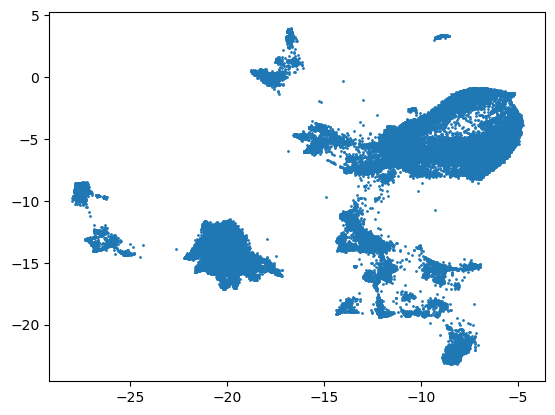

In [15]:
plt.scatter(tmp.UMAP1, tmp.UMAP2, s = 1)

In [16]:
x = clusterer.labels_
unique, counts = np.unique(x, return_counts=True)
dict(zip(unique, counts))

{-1: 90948, 0: 5589, 1: 3463}

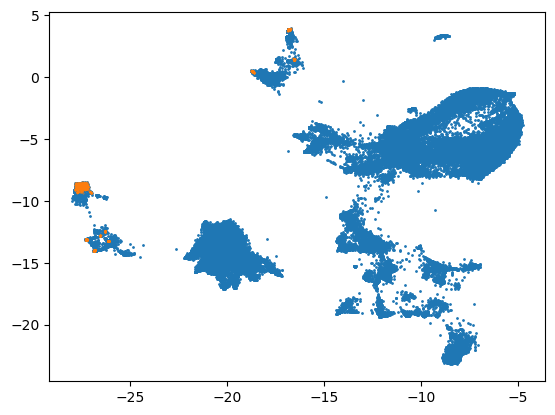

In [19]:
x = clusterer.labels_
i = np.where(x==1)[0]
plt.scatter(tmp.UMAP1, tmp.UMAP2, s = 1)
plt.scatter(tmp.UMAP1.iloc[i], tmp.UMAP2.iloc[i], s = 0.1)

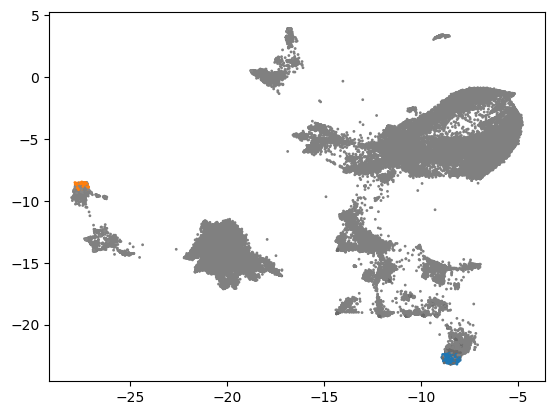

In [20]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(tmp.UMAP1, tmp.UMAP2, s = 1, c=cluster_colors)

In [23]:
x = "1e2"
print(x, type(x))
x = float(x)
print(x, type(x))
x = int(x)
print(x, type(x))

1e2 <class 'str'>
100.0 <class 'float'>
100 <class 'int'>
